In [1]:
%matplotlib widget

# Visualize case B1 solution space

Date created: 23/04/2024
Author: @mariacarrizo

In [2]:
### Import libraries
import numpy as np
import pygimli as pg
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from sklearn.metrics import root_mean_squared_error
from mpl_toolkits import mplot3d
from joblib import Parallel, delayed
import time
import sys
sys.path.insert(1, '../../src')

# Import functions
from EM1D import m0_Analysis_GN_3Lay
from Plots import Plot_m0, Plot_1DModel_3Lay, Plot_SolSpa_3Lay

In [3]:
# Load true model and data
model_B1_1 = np.load('models/model_synth_B1_1.npy')
model_B1_2 = np.load('models/model_synth_B1_2.npy')
model_B1_3 = np.load('models/model_synth_B1_3.npy')
model_B1_4 = np.load('models/model_synth_B1_4.npy')

data_B1_1 = np.load('data/data_synth_B1_1.npy')
data_B1_2 = np.load('data/data_synth_B1_2.npy')
data_B1_3 = np.load('data/data_synth_B1_3.npy')
data_B1_4 = np.load('data/data_synth_B1_4.npy')

# Lookup table sampling ranges
conds = np.load('../data/conds.npy')
thicks = np.load('../data/thicks.npy')
nsl = len(conds) # sampling number

# Load survey parameters
survey = np.load('../data/survey_3Lay.npy', allow_pickle=True).item()
offsets = survey['offsets']
height = survey['height']
freq = survey['freq']
lambd = survey['lambd']
filt = survey['filt']

# Load estimated model from Global Search
model_GS_B1_1 = np.load('results/model_GS_B1_1.npy')
model_GS_B1_2 = np.load('results/model_GS_B1_2.npy')
model_GS_B1_3 = np.load('results/model_GS_B1_3.npy')
model_GS_B1_4 = np.load('results/model_GS_B1_4.npy')

# Load estimated models from Gauss-Newton
model_GN_B1_1 = np.load('results/model_GN_B1_1.npy')
model_GN_B1_2 = np.load('results/model_GN_B1_2.npy')
model_GN_B1_3 = np.load('results/model_GN_B1_3.npy')
model_GN_B1_4 = np.load('results/model_GN_B1_4.npy')

model_GN_B1_1_hist = np.load('results/model_GN_B1_1_hist.npy')
model_GN_B1_2_hist = np.load('results/model_GN_B1_2_hist.npy')
model_GN_B1_3_hist = np.load('results/model_GN_B1_3_hist.npy')
model_GN_B1_4_hist = np.load('results/model_GN_B1_4_hist.npy')

# For example let's check the 1D model following position
pos = 10

m0 = np.array([3,3,100/1000, 100/1000, 100/1000])

# Initial model analysis

In [4]:
# Choose different electrical conductivities for the initial model
sigmas = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# Empty arrays to store the estimated models
models_m0_B1_1 = []
models_m0_B1_2 = []
models_m0_B1_3 = []
models_m0_B1_4 = []

# Calculate for different initial electrical conductivities the Gauss-Newton inversion
for sigma in sigmas:
    models_m0_B1_1.append(m0_Analysis_GN_3Lay(lambd, height, offsets, freq, filt, thicks, conds, sigma, data_B1_1[pos]))
    models_m0_B1_2.append(m0_Analysis_GN_3Lay(lambd, height, offsets, freq, filt, thicks, conds, sigma, data_B1_2[pos]))
    models_m0_B1_3.append(m0_Analysis_GN_3Lay(lambd, height, offsets, freq, filt, thicks, conds, sigma, data_B1_3[pos]))
    models_m0_B1_4.append(m0_Analysis_GN_3Lay(lambd, height, offsets, freq, filt, thicks, conds, sigma, data_B1_4[pos]))
    

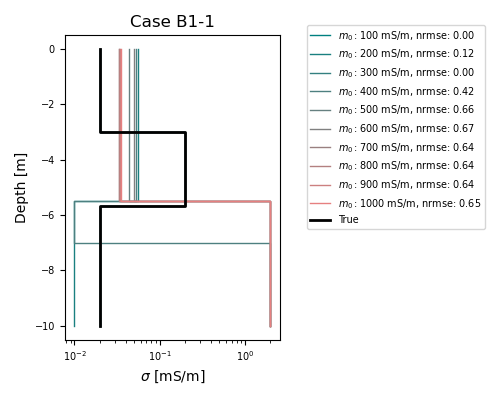

In [5]:
fig, ax = plt.subplots(figsize=(5,4))

Plot_m0(lambd, height, offsets, freq, filt, sigmas, models_m0_B1_1, model_B1_1[pos], ax=ax, legend=True)

ax.set_title('Case B1-1')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$\sigma$ [mS/m]')

plt.tight_layout()

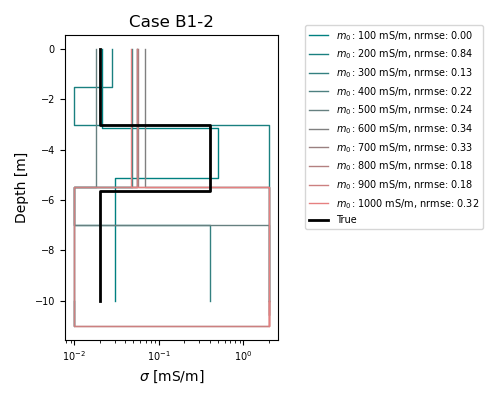

In [6]:
fig, ax = plt.subplots(figsize=(5,4))

Plot_m0(lambd, height, offsets, freq, filt, sigmas, models_m0_B1_2, model_B1_2[pos], ax=ax, legend=True)

ax.set_title('Case B1-2')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$\sigma$ [mS/m]')

plt.tight_layout()

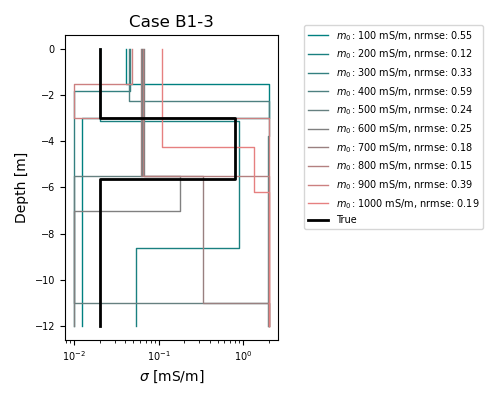

In [7]:
fig, ax = plt.subplots(figsize=(5,4))

Plot_m0(lambd, height, offsets, freq, filt, sigmas, models_m0_B1_3, model_B1_3[pos], ax=ax, legend=True, dmax=-12)

ax.set_title('Case B1-3')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$\sigma$ [mS/m]')

plt.tight_layout()

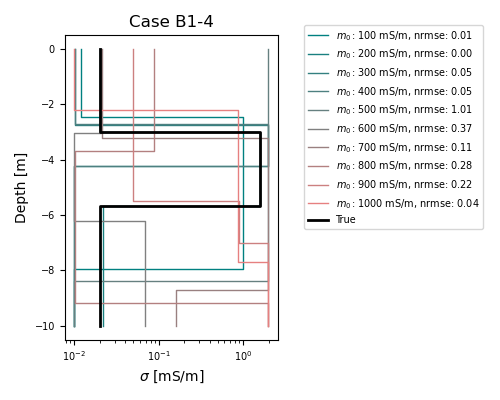

In [8]:
fig, ax = plt.subplots(figsize=(5,4))

Plot_m0(lambd, height, offsets, freq, filt, sigmas, models_m0_B1_4, model_B1_4[pos], ax=ax, legend=True)

ax.set_title('Case B1-4')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$\sigma$ [mS/m]')

plt.tight_layout()

# Solution space analysis

In [9]:
# Load solution space models and error values
models_err_B1_1 = np.load('results/models_err_B1_1_0.3.npy')
err_B1_1 = np.load('results/err_B1_1_0.3.npy')

models_err_B1_2 = np.load('results/models_err_B1_2_0.3.npy')
err_B1_2 = np.load('results/err_B1_2_0.3.npy')

models_err_B1_3 = np.load('results/models_err_B1_3_0.3.npy')
err_B1_3 = np.load('results/err_B1_3_0.3.npy')

models_err_B1_4 = np.load('results/models_err_B1_4_0.3.npy')
err_B1_4 = np.load('results/err_B1_4_0.3.npy')

# Plot 1D models in the tested position

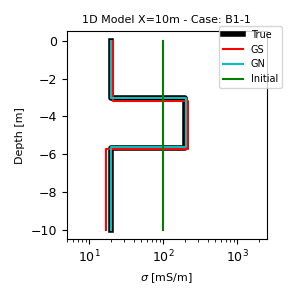

In [10]:
fig, ax = plt.subplots(figsize=(3,3))

Plot_1DModel_3Lay(ax, model_B1_1[pos], model_GS_B1_1[pos], model_GN_B1_1[pos], m0, pos,
           case='B1-1', depthmax=-10)

plt.tight_layout()

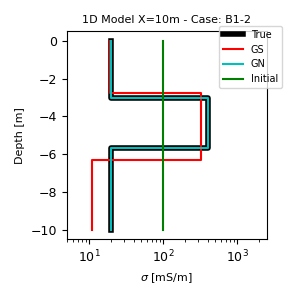

In [11]:
fig, ax = plt.subplots(figsize=(3,3))

Plot_1DModel_3Lay(ax, model_B1_2[pos], model_GS_B1_2[pos], model_GN_B1_2[pos], m0, pos, 
           case='B1-2', depthmax=-10)

plt.tight_layout()

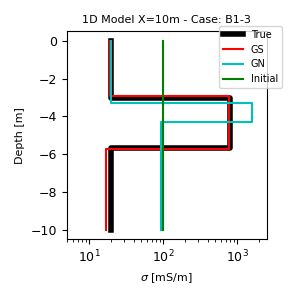

In [12]:
fig, ax = plt.subplots(figsize=(3,3))

Plot_1DModel_3Lay(ax, model_B1_3[pos], model_GS_B1_3[pos], model_GN_B1_3[pos], m0, pos, 
           case='B1-3', depthmax=-10)

plt.tight_layout()

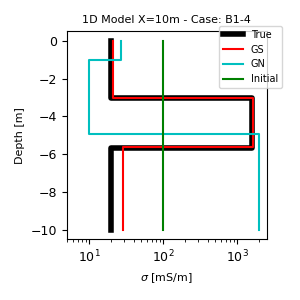

In [13]:
fig, ax = plt.subplots(figsize=(3,3))

Plot_1DModel_3Lay(ax, model_B1_4[pos], model_GS_B1_4[pos], model_GN_B1_4[pos], m0, pos,
                  case='B1-4', depthmax=-10)

plt.tight_layout()

# Plot solution space

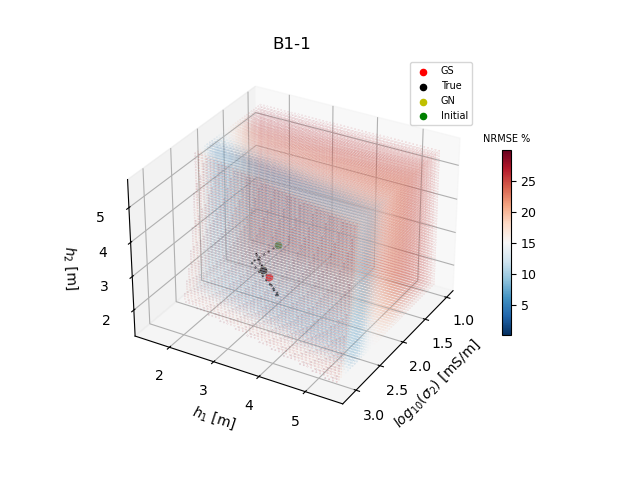

In [14]:
# Case B1-1

Plot_SolSpa_3Lay(models_err_B1_1, err_B1_1, model_B1_1, model_GS_B1_1, model_GN_B1_1, m0, model_GN_B1_1_hist, pos, title='B1-1')

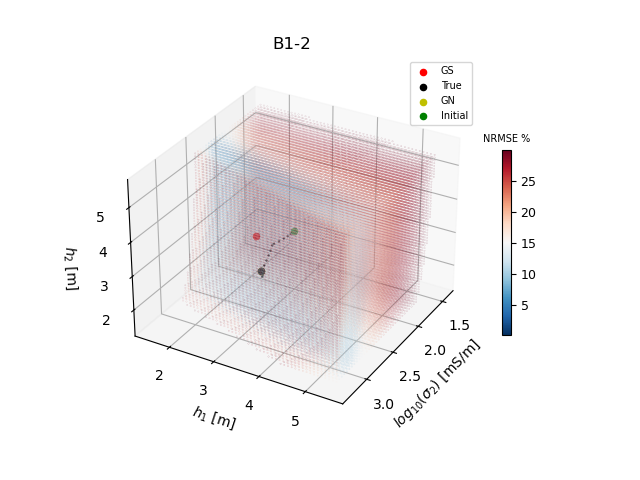

In [15]:
# Case B1-2

Plot_SolSpa_3Lay(models_err_B1_2, err_B1_2, model_B1_2, model_GS_B1_2, model_GN_B1_2, m0, model_GN_B1_2_hist, pos, title='B1-2')

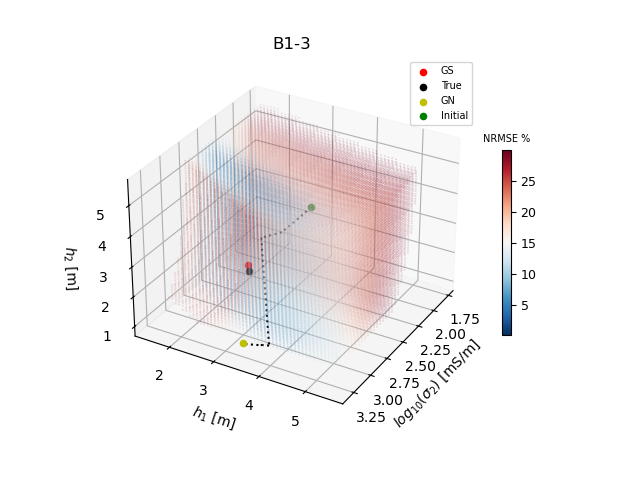

In [16]:
# Case B1-3

Plot_SolSpa_3Lay(models_err_B1_3, err_B1_3, model_B1_3, model_GS_B1_3, model_GN_B1_3, m0, model_GN_B1_3_hist, pos, title='B1-3')

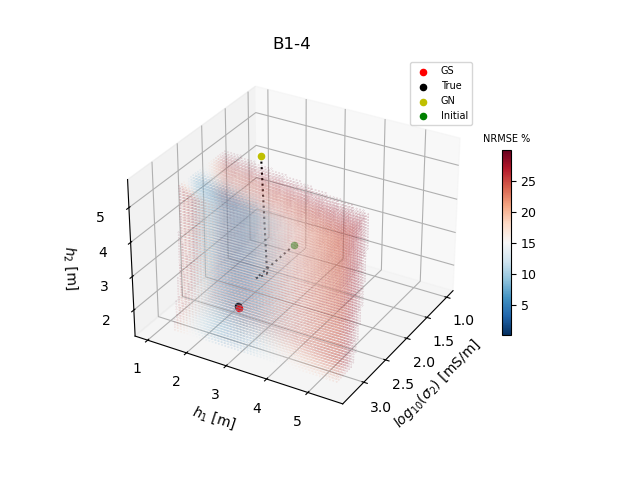

In [17]:
# Case B1-4

Plot_SolSpa_3Lay(models_err_B1_4, err_B1_4, model_B1_4, model_GS_B1_4, model_GN_B1_4, m0, model_GN_B1_4_hist, pos, title='B1-4')